###  Data Mining Process for Supervised Learning
+ Objective: Take historic data where outcome is know, create a predictive model to estimate the likely hood of that outcome on new data
#### Follows a repeatable approach roughly similiary to CRISP DM 
+ Data Loading 
+ Data Understanding
+ Data Preperation
    + preprocessing
    + splitting
+ Modeling 
+ Evaulation (repeat prior steps if performance is poor)
+ Deployment




#### Data Loading
Data Set to be used is built into sklearn ,  Breast cancer wisconsin (diagnostic) d
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer


In [1]:
# Loading Data
from sklearn.datasets import load_breast_cancer
import numpy as np
data = load_breast_cancer()
X = data['data'] ## Indpendent Features Array use to predict outcome
y = data['target']  ## Dependent Outcome varaible to Predict

feature_names = data['feature_names'] # list of features names

#### Data Understanding
In the case, a dataframe is create to leverage pandas describe function will return basic distobution info of the data

In [2]:
print('rows and cols of X ', X.shape)
print('num feature names', len(feature_names))
print('probablity of the data sets', np.mean(y))

rows and cols of X  (569, 30)
num feature names 30
probablity of the data sets 0.6274165202108963


In [3]:
## Data Understanding
import pandas as pd
df = pd.DataFrame(X, columns=feature_names)
# label col is added to the data frame, so the outcome can be invesitigate as well
df['label'] = y
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Data Understanding cont'd
Basic Correlation Heat maps show highly correlated features, as well as correlations to outcome label. In this exampled, therre are lots of negative correlations to the label (outcome) column.  Though this is not peferect statistics (the label is not a continous variable) it does reveal an over all pattern to look out for in modeling

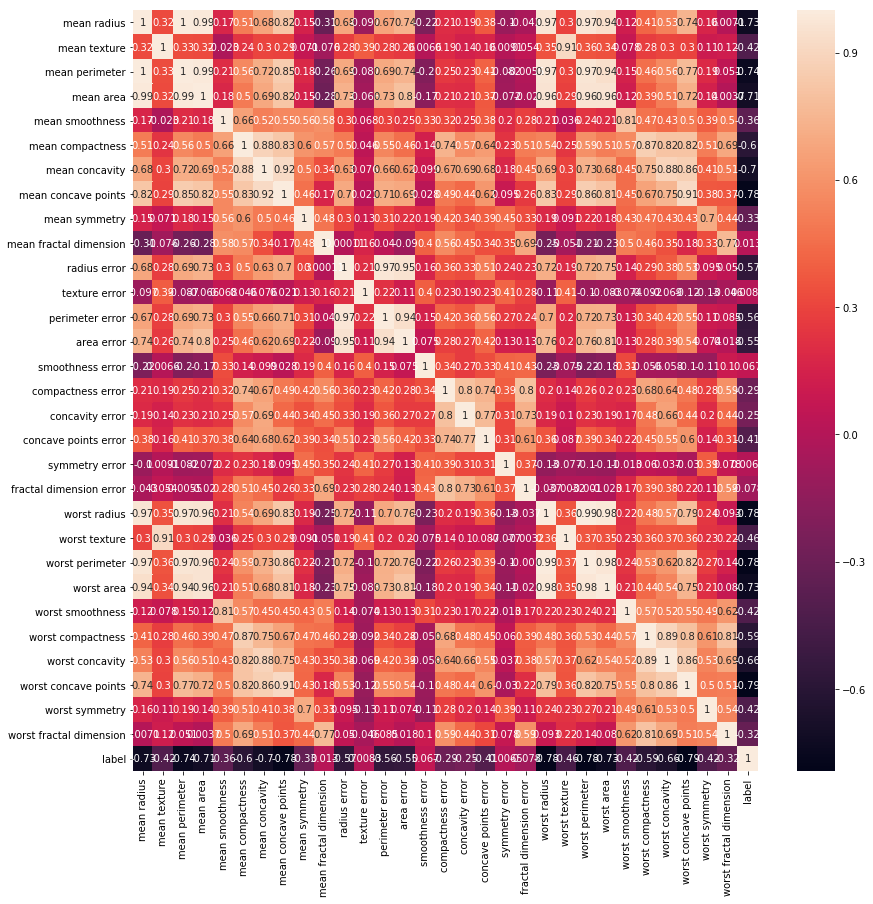

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True)

plt.show()

#### Data Understanding cont'd
It's often a good idea to plot the means of each continous variable and compair when the outcome is true vs not.

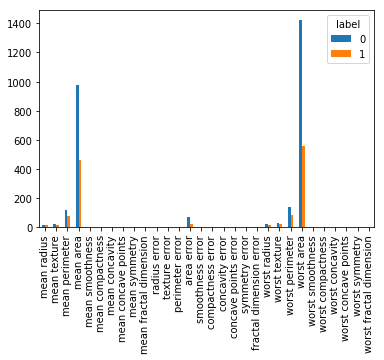

In [5]:
df.groupby('label').mean().transpose().plot.bar()
plt.show()

#### Data Preperation , preprocessing
+ The preperation for this data is is to handl Null values using imputation
+ means are saved as a list, anytime a Null value is encountered, column index is used to index this list and find the value to fill

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(X)

#### Data Preperation, Splitting
Data has to be split into training and test sets. Since this data is not time sequence data, random hold out is appropriate.  There are many ways to split data, but in general the random hold will work in most cases. T
ypical a 80/20 or 75/25 split use used.  
+ This uses the train_test split function from sklearn
+ 80% of the data from training
+ 20% for testing

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


#### Modeling
A decision Tree Classifier is built to use the training data and estimate likely hood of the outcome. This is a built in sklearn model found at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

+ Tree Parameters are extremely important, look them up as when fitting
+ In this case, max_depth of the tree is limited to two in order to prevent over fitting


In [8]:
from sklearn import tree
model  = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(x_train, y_train)

#### Modeling Cont'd
In the case of simply model such as decison Tree, it's often very helpfull to vizualize the entire model

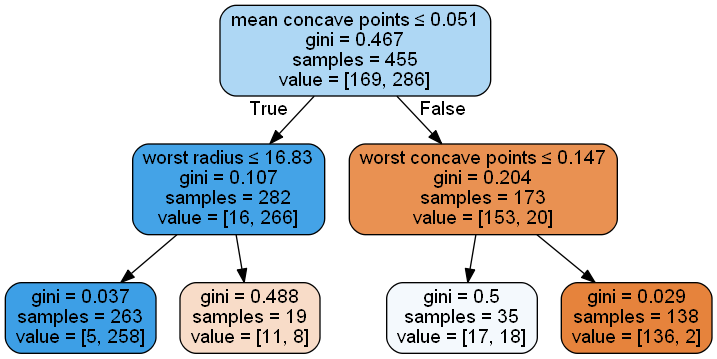

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_names, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Evaluation

In general, for binary classification tasks, Area Under the Curve of the Reciever Operating Characterist is a good choice to test performance, this plots true positive rate (TPR) against the false positive rate (FPR). In the case of nearly balanced data, accuracy or F1 or Percision or Recal are also good Choices



+ ROC AUC, between 0 and 1 , 0.5 is essentually random guess, 1.0 is a perfect model
+ Accuracy, between 0 and 1, 1 is perfect  Σ True positive + Σ True negative/Σ Total population
+ Percision (PPV) between 0, 1, represents the probablity that if the model predicts the outcome is true, that's it's actually true, Σ True positive/Σ Predicted condition positive
+ Recall, (Sensitiviy) between 0 and 1, represents the percentage of positive outcomes found in the population Σ True positive/Σ Condition positive

The advantage to AUC ROC eval is that its independent of the probably threshold.  All other measure are therefor senstive to changing the probablity cut off


+ Probably Threshold: value at which when predicted probablity is above, the outcome is predicted to be positive

In [10]:
## Predict Data in the Test Set
pred_test = model.predict_proba(x_test)[:, 1]
pred_labels_test = model.predict(x_test)
print('predicted probablities: {}'.format(pred_test[0:5]))
print('predicted labeles: {}'.format(pred_labels_test[0:5]) )

predicted probablities: [0.98098859 0.01449275 0.01449275 0.98098859 0.98098859]
predicted labeles: [1 0 0 1 1]


In [11]:
from sklearn.metrics import roc_auc_score,  classification_report, confusion_matrix

# roc Auc score 
test_auc = roc_auc_score(y_test, pred_test)
print('test AUC {}'.format(test_auc))

# classifcation Report 
report = classification_report(y_test, pred_labels_test)
print(report)

# confusion Matrix
cm = confusion_matrix(y_test, pred_labels_test)

print('TN, FP \n FN TP')
print(cm)

test AUC 0.9547985587946283
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

   micro avg       0.93      0.93      0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

TN, FP 
 FN TP
[[37  6]
 [ 2 69]]


#### Evaulation with an ROC Curve

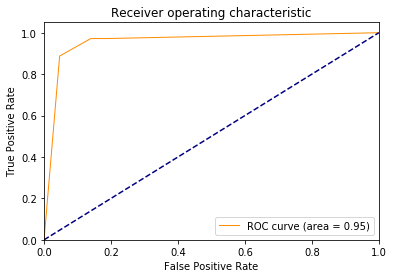

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve( y_test, pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Deployment

In this case deployment means packages the model and it's imputer into a sklearn pipeline object, so that it can be saved as one object. Also, it's best practive to test saving and reloading the model
+ Use joblib.dump to save
+ Use joblib.load to load

Once model is saved as a serialized file, it can be reloaded and run inside web apps, in containiers or used in batch processing anywhere that python env is availible with the correct depedent packages 



In [12]:
from sklearn.pipeline import Pipeline
steps = [('imputer', imputer), ( 'classifier',model )]
pipe = Pipeline(steps=steps)


# test the pipeline
pipe.predict_proba(x_test[:2, :])


array([[0.01901141, 0.98098859],
       [0.98550725, 0.01449275]])

In [13]:
# Saves the Model
import joblib
path = '_tempModel.joblib'
joblib.dump(model, path)

['_tempModel.joblib']

In [21]:
# loads the Model and tests on the first two rows of the test data 
model_loaded = joblib.load(path)
model_loaded.predict_proba(x_test[:2, :])

array([[0.01901141, 0.98098859],
       [0.98550725, 0.01449275]])